In [38]:
# imports

import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.data_analysis.query_accuracy import query_accuracy

%matplotlib inline
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = [14, 8]
plt.style.use("ggplot")

celeba_paths = glob.glob("Datasets//CelebA_test//**//*.jpg", recursive=True)
celeba_denom = len(celeba_paths)

In [39]:
def get_results(method: str, dataset: str, anon_dataset: str, mode: str = "sum"):
    res = query_accuracy(
        evaluation_method=method,
        dataset=dataset,
        p_mech_suffix="",
        anonymized_dataset=anon_dataset,
        mode=mode,
    )
    return res


def get_rank_1(dataset: str, anon_dataset: str, denom=None):
    try:
        res = get_results("rank_k", dataset=dataset, anon_dataset=anon_dataset)
        if denom is None:
            return res["1"] / celeba_denom
        else:
            return res["1"] / denom
    except:
        return np.nan


def get_rank_50(dataset: str, anon_dataset: str):
    res = get_results("rank_k", dataset=dataset, anon_dataset=anon_dataset)
    return res["50"] / celeba_denom


def get_validation(dataset: str, anon_dataset: str):
    res = get_results(
        "lfw_validation", dataset=dataset, anon_dataset=anon_dataset, mode="eer"
    )
    return res


def get_utility_metric(metric: str, dataset: str, anon_dataset: str, denom=None):
    try:
        res = get_results("utility", dataset=dataset, anon_dataset=anon_dataset)
        if denom is None:
            return res[metric] / celeba_denom
        else:
            return res[metric] / denom
    except:
        return np.nan


In [40]:
def generate_row(title: str, suffix: str):
    rank_1 = get_rank_1("CelebA", f"CelebA_test_{suffix}")
    rank_50 = get_rank_50("CelebA", f"CelebA_test_{suffix}")
    val = get_validation("lfw", f"lfw_{suffix}")
    ssim = get_utility_metric("ssim", "CelebA_test", f"CelebA_test_{suffix}")
    age = get_utility_metric("age", "CelebA_test", f"CelebA_test_{suffix}")
    emotion = get_utility_metric("emotion", "CelebA_test", f"CelebA_test_{suffix}")
    race = get_utility_metric("race", "CelebA_test", f"CelebA_test_{suffix}")
    gender = get_utility_metric("gender", "CelebA_test", f"CelebA_test_{suffix}")

    return {
        "Method": title,
        r"Rank 1 (\%) $\downarrow$": rank_1 * 100,
        r"Rank 50 (\%) $\downarrow$": rank_50 * 100,
        r"EER (\%) $\uparrow$": val * 100,
        r"SSIM $\uparrow$": ssim,
        r"Age (diff.) $\downarrow$": age,
        r"Race (\%) $\uparrow$": race * 100,
        r"Gender (\%) $\uparrow$": gender * 100,
        r"Emotion (\%) $\uparrow$": emotion * 100,
    }


def generate_real_row(title: str):
    rank_1 = get_rank_1("CelebA", "../Datasets/CelebA_test")
    rank_50 = get_rank_50("CelebA", "../Datasets/CelebA_test")
    val = get_validation("lfw", "../Datasets/lfw")
    ssim = get_utility_metric("ssim", "CelebA_test", "../Datasets/CelebA_test")
    age = get_utility_metric("age", "CelebA_test", "../Datasets/CelebA_test")
    emotion = get_utility_metric("emotion", "CelebA_test", "../Datasets/CelebA_test")
    race = get_utility_metric("race", "CelebA_test", "../Datasets/CelebA_test")
    gender = get_utility_metric("gender", "CelebA_test", "../Datasets/CelebA_test")

    return {
        "Method": title,
        r"Rank 1 (\%) $\downarrow$": rank_1 * 100,
        r"Rank 50 (\%) $\downarrow$": rank_50 * 100,
        r"EER (\%) $\uparrow$": val * 100,
        r"SSIM $\uparrow$": ssim,
        r"Age (diff.) $\downarrow$": age,
        r"Race (\%) $\uparrow$": race * 100,
        r"Gender (\%) $\uparrow$": gender * 100,
        r"Emotion (\%) $\uparrow$": emotion * 100,
    }


def generate_row_anonghost(title: str, suffix: str):
    rank_1 = get_rank_1("CelebA", f"anonghost/CelebA_test_{suffix}")
    rank_50 = get_rank_50("CelebA", f"anonghost/CelebA_test_{suffix}")
    val = get_validation("lfw", f"anonghost/lfw_{suffix}")
    ssim = get_utility_metric("ssim", "CelebA_test", f"anonghost/CelebA_test_{suffix}")
    age = get_utility_metric("age", "CelebA_test", f"anonghost/CelebA_test_{suffix}")
    emotion = get_utility_metric(
        "emotion", "CelebA_test", f"anonghost/CelebA_test_{suffix}"
    )
    race = get_utility_metric("race", "CelebA_test", f"anonghost/CelebA_test_{suffix}")
    gender = get_utility_metric(
        "gender", "CelebA_test", f"anonghost/CelebA_test_{suffix}"
    )

    return {
        "Method": title,
        r"Rank 1 (\%) $\downarrow$": rank_1 * 100,
        r"Rank 50 (\%) $\downarrow$": rank_50 * 100,
        r"EER (\%) $\uparrow$": val * 100,
        r"SSIM $\uparrow$": ssim,
        r"Age (diff.) $\downarrow$": age,
        r"Race (\%) $\uparrow$": race * 100,
        r"Gender (\%) $\uparrow$": gender * 100,
        r"Emotion (\%) $\uparrow$": emotion * 100,
    }


def generate_row_codec(title: str, suffix: str, is_pca=False):
    codec_var = "codec" if not is_pca else "codecpca"
    rank_1 = get_rank_1(codec_var, f"{codec_var}_{suffix}", denom=256)
    ssim = get_utility_metric("ssim", codec_var, f"{codec_var}_{suffix}", denom=256)
    age = get_utility_metric("age", codec_var, f"{codec_var}_{suffix}", denom=256)
    emotion = get_utility_metric(
        "emotion", codec_var, f"{codec_var}_{suffix}", denom=256
    )
    race = get_utility_metric("race", codec_var, f"{codec_var}_{suffix}", denom=256)
    gender = get_utility_metric("gender", codec_var, f"{codec_var}_{suffix}", denom=256)

    return {
        "Method": title,
        r"Rank 1 (\%) $\downarrow$": rank_1 * 100,
        r"SSIM $\uparrow$": ssim,
        r"Age (diff.) $\downarrow$": age,
        r"Race (\%) $\uparrow$": race * 100,
        r"Gender (\%) $\uparrow$": gender * 100,
        r"Emotion (\%) $\uparrow$": emotion * 100,
    }

In [41]:
# # Generate a table for our method

# eps = r"$\varepsilon$"
# theta = r"$\theta$="
# deg = r"$\degree$"

# sources = [
#     (r"\textbf{Rand. sampling}", "eps0_theta0"),
#     (f"{eps}=1", "eps1_theta0"),
#     (f"{eps}=10", "eps10_theta0"),
#     (f"{eps}=100", "eps100_theta0"),
#     (f"{eps}=1000", "eps1000_theta0"),
#     (r"\textbf{Img. recon.}", "eps-1_theta0"),
#     # (f"{theta}30{deg}", "eps-1_theta30"),
#     (f"{theta}45{deg}", "eps-1_theta60"),
#     (f"{theta}90{deg}", "eps-1_theta90"),
#     (f"{theta}135{deg}", "eps-1_theta120"),
#     (f"{theta}180{deg}", "eps-1_theta150"),
#     # (f"{theta}180{deg}", "eps-1_theta180"),
# ]

# records = []
# for s in sources:
#     records.append(generate_row_anonghost(s[0], s[1]))

# baselines = [
#     (r"PixelDP (strong)", "pixel_dp_eps1.0_b16"),
#     (r"PixelDP (weak)", "pixel_dp_eps15.0_b4"),
#     (r"MetricSVD (strong)", "metric_privacy_eps1.0_k4"),
#     (r"MetricSVD (weak)", "metric_privacy_eps10.0_k8"),
#     (r"IdentityDP ($\varepsilon = 1$)", "identity_dp_eps1.0"),
#     (r"IdentityDP ($\varepsilon = 100$)", "identity_dp_eps100.0"),
# ]

# for b in baselines:
#     records.append(generate_row(b[0], b[1]))

# df = pd.DataFrame.from_records(records)
# latex_table = df.to_latex(
#     float_format="%.2f", index=False, label="tab:anonghost_results_table"
# )
# print(latex_table)

In [42]:
# Generate a table for simswap backend to compare against

eps = r"\epsmethod{} $\varepsilon$"
theta = r"\thetamethod{} $\theta$="
deg = r"$\degree$"

sources = [
    (r"\textbf{Img. reconst.}", "dtheta_privacy_theta0.0_eps-1.0"),
    (f"{eps}=200", "dtheta_privacy_theta0.0_eps200.0"),
    (f"{eps}=100", "dtheta_privacy_theta0.0_eps100.0"),
    (f"{eps}=50", "dtheta_privacy_theta0.0_eps50.0"),
    (f"{eps}=10", "dtheta_privacy_theta0.0_eps10.0"),
    (f"{eps}=1", "dtheta_privacy_theta0.0_eps1.0"),
    (r"\textbf{Rand. sampling}", "dtheta_privacy_theta0.0_eps0.0"),
    (f"{theta}60{deg}", "dtheta_privacy_theta60.0_eps-1.0"),
    (f"{theta}90{deg}", "dtheta_privacy_theta90.0_eps-1.0"),
    (f"{theta}135{deg}", "dtheta_privacy_theta135.0_eps-1.0"),
    (f"{theta}150{deg}", "dtheta_privacy_theta150.0_eps-1.0"),
    (r"IdentityDP ($\varepsilon = 100$)", "identity_dp_eps100.0"),
    (r"IdentityDP ($\varepsilon = 1$)", "identity_dp_eps1.0"),
    (r"PixelDP (weak)", "pixel_dp_eps15.0_b4"),
    (r"PixelDP (strong)", "pixel_dp_eps1.0_b16"),
    (r"MetricSVD (weak)", "metric_privacy_eps10.0_k8"),
    (r"MetricSVD (strong)", "metric_privacy_eps1.0_k4"),
]

records = []
# real images
records.append(generate_real_row(r"\textbf{Real Images}"))

for s in sources:
    records.append(generate_row(s[0], s[1]))

df = pd.DataFrame.from_records(records)
latex_table = df.to_latex(float_format="%.2f", index=False, label="tab:2D_results")
print(latex_table)

\begin{table}
\label{tab:2D_results}
\begin{tabular}{lrrrrrrrr}
\toprule
Method & Rank 1 (\%) $\downarrow$ & Rank 50 (\%) $\downarrow$ & EER (\%) $\uparrow$ & SSIM $\uparrow$ & Age (diff.) $\downarrow$ & Race (\%) $\uparrow$ & Gender (\%) $\uparrow$ & Emotion (\%) $\uparrow$ \\
\midrule
\textbf{Real Images} & 98.13 & 98.52 & 2.95 & 1.00 & 0.00 & 100.00 & 100.00 & 100.00 \\
\textbf{Img. reconst.} & 84.50 & 92.92 & 4.67 & 0.92 & 3.45 & 78.57 & 91.05 & 74.10 \\
\epsmethod{} $\varepsilon$=200 & 54.91 & 83.14 & 8.93 & 0.91 & 4.31 & 67.22 & 74.96 & 73.55 \\
\epsmethod{} $\varepsilon$=100 & 34.29 & 69.81 & 11.42 & 0.91 & 4.66 & 62.96 & 67.80 & 73.13 \\
\epsmethod{} $\varepsilon$=50 & 23.61 & 58.46 & 13.15 & 0.91 & 4.80 & 61.27 & 64.72 & 72.46 \\
\epsmethod{} $\varepsilon$=10 & 16.17 & 48.62 & 17.82 & 0.91 & 4.90 & 61.17 & 63.94 & 72.55 \\
\epsmethod{} $\varepsilon$=1 & 14.23 & 46.55 & 16.90 & 0.91 & 4.87 & 60.22 & 64.02 & 72.68 \\
\textbf{Rand. sampling} & 14.54 & 46.78 & 17.57 & 0.91 & 4.87 

In [45]:
# Generate a table for GHOST backend

eps = r"\epsmethod{} $\varepsilon$"
theta = r"\thetamethod{} $\theta$="
deg = r"$\degree$"

sources = [
    (r"\textbf{Img. reconst.}", "eps-1_theta0"),
    # (f"{eps}=1000", "eps1000_theta0"),
    (f"{eps}=100", "eps100_theta0"),
    # (f"{eps}=50", "eps50_theta0"),
    (f"{eps}=10", "eps10_theta0"),
    (f"{eps}=1", "eps1_theta0"),
    (r"\textbf{Rand. sampling}", "eps0_theta0"),
    (f"{theta}60{deg}", "eps-1_theta60"),
    (f"{theta}90{deg}", "eps-1_theta90"),
    (f"{theta}135{deg}", "eps-1_theta135"),
    (f"{theta}150{deg}", "eps-1_theta150"),
]

# sources = [
#     (r"\textbf{Rand. sampling}", "eps0_theta0"),
#     (f"{eps}=1", "eps1_theta0"),
#     (f"{eps}=10", "eps10_theta0"),
#     (f"{eps}=100", "eps100_theta0"),
#     (f"{eps}=1000", "eps1000_theta0"),
#     (r"\textbf{Img. recon.}", "eps-1_theta0"),
#     # (f"{theta}30{deg}", "eps-1_theta30"),
#     (f"{theta}45{deg}", "eps-1_theta60"),
#     (f"{theta}90{deg}", "eps-1_theta90"),
#     (f"{theta}135{deg}", "eps-1_theta120"),
#     (f"{theta}180{deg}", "eps-1_theta150"),
#     # (f"{theta}180{deg}", "eps-1_theta180"),
# ]

records = []
# real images
records.append(generate_real_row(r"\textbf{Real Images}"))

for s in sources:
    records.append(generate_row_anonghost(s[0], s[1]))

df = pd.DataFrame.from_records(records)
latex_table = df.to_latex(
    float_format="%.2f", index=False, label="tab:2D_results_ghost"
)
print(latex_table)

\begin{table}
\label{tab:2D_results_ghost}
\begin{tabular}{lrrrrrrrr}
\toprule
Method & Rank 1 (\%) $\downarrow$ & Rank 50 (\%) $\downarrow$ & EER (\%) $\uparrow$ & SSIM $\uparrow$ & Age (diff.) $\downarrow$ & Race (\%) $\uparrow$ & Gender (\%) $\uparrow$ & Emotion (\%) $\uparrow$ \\
\midrule
\textbf{Real Images} & 98.13 & 98.52 & 2.95 & 1.00 & 0.00 & 100.00 & 100.00 & 100.00 \\
\textbf{Img. reconst.} & 97.80 & 98.21 & 3.48 & 0.96 & 2.52 & 85.42 & 93.67 & 76.97 \\
\epsmethod{} $\varepsilon$=100 & 50.66 & 83.86 & 7.48 & 0.94 & 4.74 & 58.34 & 55.05 & 71.74 \\
\epsmethod{} $\varepsilon$=10 & 17.53 & 50.18 & 15.43 & 0.93 & 5.01 & 55.75 & 52.54 & 70.75 \\
\epsmethod{} $\varepsilon$=1 & 15.37 & 46.15 & 16.11 & 0.93 & 4.93 & 56.12 & 52.34 & 70.67 \\
\textbf{Rand. sampling} & 14.96 & 45.97 & 16.90 & 0.93 & 4.99 & 54.82 & 52.40 & 70.59 \\
\thetamethod{} $\theta$=60$\degree$ & 93.79 & 97.78 & 3.61 & 0.95 & 3.81 & 70.24 & 71.14 & 73.92 \\
\thetamethod{} $\theta$=90$\degree$ & 14.64 & 45.88 & 16.6

In [ ]:
# Codec avatar table

eps = r"\epsmethod{} $\varepsilon$"
theta = r"\thetamethod{} $\theta$="
deg = r"$\degree$"

sources = [
    (r"\textbf{Img. reconst.}", "eps-1", False),
    (f"{eps}=50", "eps50", False),
    (f"{eps}=10", "eps10", False),
    (f"{eps}=1", "eps1", False),
    (r"\textbf{Rand. sampling}", "eps0", False),
    (f"{theta}60{deg}", "theta60", False),
    (f"{theta}90{deg}", "theta90", False),
    (f"{theta}135{deg}", "theta120", False),
    (f"{theta}150{deg}", "theta150", False),
    # ("PCA reconst.", "eps-1", True),
    # (f"{theta}180{deg}", "theta180"),
]

records = []
for s in sources:
    records.append(generate_row_codec(s[0], s[1], s[2]))

df = pd.DataFrame.from_records(records)
latex_table = df.to_latex(float_format="%.2f", index=False, label="tab:avatar_results")
print(latex_table)

\begin{table}
\label{tab:codec_results_table}
\begin{tabular}{lrrrrrr}
\toprule
Method & Rank 1 (\%) $\downarrow$ & SSIM $\uparrow$ & Age (diff.) $\downarrow$ & Race (\%) $\uparrow$ & Gender (\%) $\uparrow$ & Emotion (\%) $\uparrow$ \\
\midrule
\textbf{Img. reconst.} & 98.05 & 0.86 & 3.28 & 78.91 & 89.06 & 64.06 \\
\epsmethod{} $\varepsilon$=50 & 87.50 & 0.83 & 3.96 & 73.05 & 84.38 & 59.77 \\
\epsmethod{} $\varepsilon$=10 & 20.31 & 0.76 & 4.69 & 58.20 & 70.31 & 50.39 \\
\epsmethod{} $\varepsilon$=1 & 3.91 & 0.72 & 5.08 & 51.17 & 65.23 & 46.09 \\
\textbf{Rand. sampling} & 1.95 & 0.71 & 5.20 & 46.09 & 57.03 & 48.05 \\
\thetamethod{} $\theta$=60$\degree$ & 16.02 & 0.76 & 5.06 & 55.86 & 70.31 & 48.44 \\
\thetamethod{} $\theta$=90$\degree$ & 1.95 & 0.70 & 5.45 & 37.89 & 58.59 & 45.31 \\
\thetamethod{} $\theta$=135$\degree$ & 2.34 & 0.68 & 5.41 & 36.72 & 46.09 & 40.62 \\
\thetamethod{} $\theta$=150$\degree$ & 0.78 & 0.67 & 5.58 & 34.77 & 41.41 & 39.06 \\
\bottomrule
\end{tabular}
\end{table}

In [ ]:
# plt.rcParams["figure.figsize"] = [10, 4]


# def inv_lin(x, a, b):
#     return a * (1 / np.asarray(x)) + b


# def nat_log(x, a, b):
#     return a * np.log(x) + b


# def lin(x, a, b):
#     return a * x + b


# eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
# theta_list = [0, 30, 45, 60, 90, 120, 135, 150, 180]

# for metric in ["Rank 1", "Validation", "Age", "Race", "Gender", "SSIM", "Emotion"]:
#     plt.clf()

#     met1 = []
#     met2 = []

#     for eps in eps_list:
#         if metric == "Rank 1":
#             met1.append(
#                 get_rank_1(
#                     "CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}"
#                 )
#             )
#         elif metric == "Validation":
#             met1.append(
#                 get_validation("lfw", f"lfw_dtheta_privacy_theta0.0_eps{eps:.1f}")
#             )
#         else:
#             met1.append(
#                 get_utility_metric(
#                     metric.lower(),
#                     "CelebA_test",
#                     f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}",
#                 )
#             )
#     for theta in theta_list:
#         if metric == "Rank 1":
#             met2.append(
#                 get_rank_1(
#                     "CelebA_test",
#                     f"CelebA_test_dtheta_privacy_theta{theta:.1f}_eps-1.0",
#                 )
#             )
#         elif metric == "Validation":
#             met2.append(
#                 get_validation("lfw", f"lfw_dtheta_privacy_theta{theta:.1f}_eps-1.0")
#             )
#         else:
#             met2.append(
#                 get_utility_metric(
#                     metric.lower(),
#                     "CelebA_test",
#                     f"CelebA_test_dtheta_privacy_theta{theta:.1f}_eps-1.0",
#                 )
#             )

#     fig, ax = plt.subplots(1, 2)

#     ax[0].plot(eps_list, met1, marker=".", c="orange")
#     ax[1].plot(theta_list, met2, marker=".", c="b")
#     ax[0].set_xticks(eps_list, eps_list, fontsize=12)
#     ax[1].set_xticks(theta_list, theta_list, fontsize=12)
#     ax[0].set_title("AvatarDP", fontsize=22, style="italic")
#     ax[0].set_xlabel("ε", fontsize=16)
#     ax[1].set_title("AvatarRotation", fontsize=22, style="italic")
#     ax[1].set_xlabel(r"$\theta$", fontsize=16)

#     if metric not in ["SSIM", "Age"]:
#         ax[0].set_ylim([-0.05, 1.05])
#         ax[0].set_yticks(
#             [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"], fontsize=12
#         )
#         ax[1].set_ylim([-0.05, 1.05])
#         ax[1].set_yticks(
#             [0, 0.25, 0.5, 0.75, 1], [], fontsize=12
#         )  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
#     elif metric == "SSIM":
#         ax[0].set_ylim([-0.05, 1.05])
#         ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1], fontsize=12)
#         ax[1].set_ylim([-0.05, 1.05])
#         ax[1].set_yticks(
#             [0, 0.25, 0.5, 0.75, 1], [], fontsize=12
#         )  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
#     elif metric == "Age":
#         ax[0].set_ylim([-0.05, 6.05])
#         ax[0].set_yticks([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6], fontsize=12)
#         ax[0].set_ylabel("Years")
#         ax[1].set_ylim([-0.05, 1.05])
#         ax[1].set_yticks(
#             [0, 1, 2, 3, 4, 5, 6], [], fontsize=12
#         )  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])

#     plt.suptitle(f"Empirical Results: {metric}", fontsize=26)
#     plt.tight_layout()
#     plt.savefig(f"figures/{metric}_lineplot.png")

AssertionError: Results//Privacy//lfw_validation//lfw_dtheta_privacy_theta0.0_eps400.0.csv does not exist!

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [ ]:
eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
# eps_list = [1, 10, 100, 1000]

dtheta_priv, idp_priv, dtheta_gend, idp_gend, dtheta_race, idp_race = (
    [],
    [],
    [],
    [],
    [],
    [],
)

for eps in eps_list:
    dtheta_priv.append(
        get_rank_1("CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}")
    )
    dtheta_gend.append(
        get_utility_metric(
            "gender", "CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}"
        )
    )
    dtheta_race.append(
        get_utility_metric(
            "race", "CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}"
        )
    )

    idp_priv.append(get_rank_1("CelebA_test", f"CelebA_test_identity_dp_eps{eps:.1f}"))
    idp_gend.append(
        get_utility_metric(
            "gender", "CelebA_test", f"CelebA_test_identity_dp_eps{eps:.1f}"
        )
    )
    idp_race.append(
        get_utility_metric(
            "race", "CelebA_test", f"CelebA_test_identity_dp_eps{eps:.1f}"
        )
    )

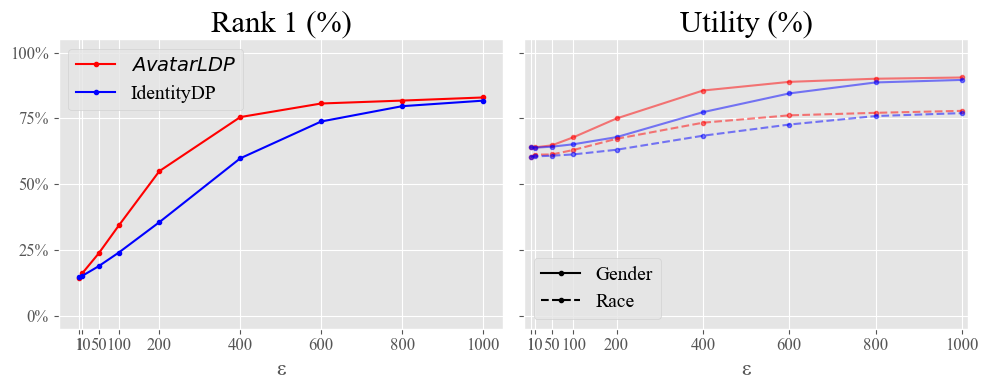

In [ ]:
plt.rcParams["figure.figsize"] = [10, 4]


def inv_lin(x, a, b):
    return a * (1 / np.asarray(x)) + b


def nat_log(x, a, b):
    return a * np.log(x) + b


def lin(x, a, b):
    return a * x + b


eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]


fig, ax = plt.subplots(1, 2)

ax[0].plot(eps_list, dtheta_priv, label=r"$\it{AvatarLDP}$", c="r", marker=".")
ax[0].plot(eps_list, idp_priv, label="IdentityDP", c="b", marker=".")

# ax[0].plot(
#     np.linspace(0, 1000, 1001),
#     lin(np.linspace(0, 1000, 1001), 0.00066, 0.15),
#     c="m",
#     linestyle="dashed",
#     alpha=0.75,
#     label="Linear",
# )

# da_vals = np.linspace(0, 1200, 1201)
# da_vals[0:10] = np.nan
# ax[0].plot(
#     da_vals - 10,
#     # inv_lin(da_vals, -70, 0.9),
#     # da_vals,
#     nat_log(da_vals, 0.17, -0.3),
#     c="gray",
#     linestyle="dashed",
#     alpha=0.75,
#     label="ln(x)",
# )

ax[1].plot([np.nan], [np.nan], label="Gender", c="k", marker=".")
ax[1].plot(eps_list, dtheta_gend, c="r", marker=".", alpha=0.5)
ax[1].plot(eps_list, idp_gend, c="b", marker=".", alpha=0.5)

ax[1].plot([np.nan], [np.nan], label="Race", c="k", marker=".", linestyle="dashed")
ax[1].plot(eps_list, dtheta_race, c="r", marker=".", linestyle="dashed", alpha=0.5)
ax[1].plot(eps_list, idp_race, c="b", marker=".", linestyle="dashed", alpha=0.5)

ax[0].set_ylim([-0.05, 1.05])
ax[0].set_yticks(
    [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"], fontsize=12
)
# ax[0].set_xlim([-15, 1015])
ax[0].set_xticks(eps_list, eps_list, fontsize=12)

ax[1].set_ylim([-0.05, 1.05])
ax[1].set_yticks(
    [0, 0.25, 0.5, 0.75, 1], [], fontsize=12
)  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
ax[1].set_xlim([-15, 1015])
ax[1].set_xticks(eps_list, eps_list, fontsize=12)

ax[0].set_title("Rank 1 (%)", fontsize=22)
ax[0].set_xlabel("ε", fontsize=16)
ax[1].set_title("Utility (%)", fontsize=22)
ax[1].set_xlabel("ε", fontsize=16)


ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
plt.tight_layout()
plt.show()

----
comparing eps=1
statistic: 2.222509265741144
p_value: 0.13601974509459588
----
comparing eps=10
statistic: 3.842664629894433
p_value: 0.04997100308938404
----
comparing eps=50
statistic: 35.39981748588102
p_value: 2.7074524708983544e-09
----
comparing eps=100
statistic: 161.59685026057826
p_value: 5.9770058561029995e-37
----
comparing eps=200
statistic: 483.7664769744963
p_value: 1.3941032296776804e-106
----
comparing eps=400
statistic: 408.2901959020152
p_value: 2.4485284691002077e-90
----
comparing eps=600
statistic: 134.7494025221065
p_value: 4.203009397192116e-31
----
comparing eps=800
statistic: 41.47656999174053
p_value: 1.206455652260324e-10
----
comparing eps=1000
statistic: 8.841070766260417
p_value: 0.002947022114362873


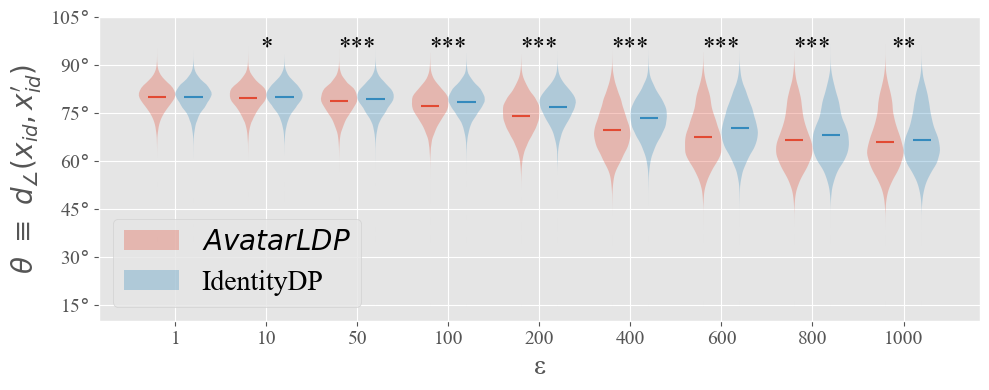

In [ ]:
import scipy.stats as stats

plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["text.usetex"] = False


eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]

dtheta_sims, idp_sims = [], []
for eps in eps_list:
    try:
        df = pd.read_csv(
            f"Results/Privacy/rank_k/CelebA_test_dtheta_privacy_theta0.0_eps{eps}.0.csv"
        )
        dtheta_sims.append(list(1 - df["similarity"]))

        df = pd.read_csv(
            f"Results/Privacy/rank_k/CelebA_test_identity_dp_eps{eps}.0.csv"
        )
        idp_sims.append(list(1 - df["similarity"]))
    except:
        print(f"skip {eps}")

p_values = []
for i in range(len(idp_sims)):
    statistic, p_value = stats.levene(dtheta_sims[i], idp_sims[i])
    print(f"----\ncomparing eps={eps_list[i]}")
    print(f"statistic: {statistic}")
    print(f"p_value: {p_value}")
    p_values.append(p_value)


xticks1 = np.asarray([1.25 * i + 1 for i in range(len(dtheta_sims))])
xticks2 = np.asarray([1.25 * i + 1 for i in range(len(idp_sims))])

for row in dtheta_sims:
    for i in range(len(row)):
        row[i] = np.arccos(row[i]) * 180 / np.pi
for row in idp_sims:
    for i in range(len(row)):
        row[i] = np.arccos(row[i]) * 180 / np.pi


vp1 = plt.violinplot(
    dtheta_sims, positions=xticks1 - 0.25, showmeans=True, showextrema=False
)
vp2 = plt.violinplot(
    idp_sims, positions=xticks2 + 0.25, showmeans=True, showextrema=False
)

plt.legend(
    [vp1["bodies"][0], vp2["bodies"][0]],
    [r"$\it{AvatarLDP}$", "IdentityDP"],
    loc=3,
    fontsize=20,
)


for i in range(len(p_values)):
    symb = ""
    if p_values[i] < 0.0005:
        symb = "***"
    elif p_values[i] < 0.005:
        symb = "**"
    elif p_values[i] < 0.05:
        symb = "*"

    plt.text(xticks1[i], 95, symb, fontsize=18, ha="center", va="center")

plt.yticks(
    [15, 30, 45, 60, 75, 90, 105],
    [
        r"15$\degree$",
        r"30$\degree$",
        r"45$\degree$",
        r"60$\degree$",
        r"75$\degree$",
        r"90$\degree$",
        r"105$\degree$",
    ],
    fontsize=14,
)
plt.ylabel(r"$\theta \ \equiv \ d_{\angle}(x_{id}, x_{id}')$", fontsize=20)
# plt.ylim([-0.1, 1])
plt.xticks(xticks1, eps_list[0 : len(dtheta_sims)], fontsize=14)
plt.xlabel("ε", fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
# do a test comparison between ours and identitydp

from src.anonymization import anonymize
from src.privacy_mechanisms.simswap.identity_dp import calculate_sensitivity


def cos_sim(A, B):
    try:
        A = A.squeeze()
        B = B.squeeze()
        return 1 - np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
    except:
        return 2


def arccos(A, B):
    return np.arccos(1 - cos_sim(A, B)) * 180 / np.pi


def euclid_dist(A, B):
    try:
        A = A.squeeze()
        B = B.squeeze()
        return np.linalg.norm(A - B)
    except:
        return 1


eps_list = [1, 5, 10, 50]
dims = 3
n_samples = 1024

start_vector = np.random.uniform(low=-1, high=1, size=dims)
start_vector /= np.linalg.norm(start_vector)
start_vector = start_vector.squeeze()

ours_vectors, idp_vectors = [], []
ours_dists, idp_dists = [], []

print(f"Distances for {n_samples} in R^{dims}")
for eps in eps_list:  # tqdm.tqdm(eps_list):
    for i in range(n_samples):
        ours_vector = np.copy(start_vector)
        ours_vector = anonymize(ours_vector, epsilon=eps, theta=0, dims=dims)
        ours_vector /= np.linalg.norm(ours_vector)

        ours_vectors.append(ours_vector.squeeze())

        idp_vector = np.copy(start_vector)
        sensitivity = calculate_sensitivity()
        # sens = sensitivity["sensitivity"]  ##  / 512.0
        sens = euclid_dist(np.ones(3), -np.ones(3))
        noise = np.random.laplace(
            loc=0, scale=sens / (eps + 1e-8), size=idp_vector.shape
        )
        idp_vector = idp_vector + noise
        # idp_vector = idp_vector / np.linalg.norm(idp_vector)

        idp_vectors.append(idp_vector.squeeze())

        ours_dists.append(euclid_dist(start_vector, ours_vector))
        idp_dists.append(euclid_dist(start_vector, idp_vector))

    print(
        f"eps={eps:4.0f}, Mean euclidean distance (ours)={np.mean(ours_dists):.4f}, (IdentityDP)={np.mean(idp_dists):.4f}"
    )


Distances for 1024 in R^3
IdentityDP sensitivity is {'sensitivity': 30.271626, 'max': 0.29917175, 'min': -0.26779044}.
eps=   1, Mean euclidean distance (ours)=1.0866, (IdentityDP)=7.3226
eps=   5, Mean euclidean distance (ours)=0.8211, (IdentityDP)=4.3747
eps=  10, Mean euclidean distance (ours)=0.6827, (IdentityDP)=3.1558
eps=  50, Mean euclidean distance (ours)=0.5560, (IdentityDP)=2.4023


In [ ]:
populating_samples = []
coarseness = 4
for i in np.linspace(-1, 1, coarseness):
    for j in np.linspace(-1, 1, coarseness):
        for z in np.linspace(-1, 1, coarseness):
            s = np.asarray([i, j, z])
            s /= np.linalg.norm(s)
            populating_samples.append(s.squeeze())

X = ours_vectors + idp_vectors + populating_samples + [start_vector]
X = np.stack(X)
# X = X - np.stack([start_vector for _ in range((8 * n_samples) + (2 * n_samples * len(eps_list)) + 1)])
# X_embedded = TSNE(
#     n_components=3,
#     learning_rate="auto",
#     init="random",
#     perplexity=50,
#     # metric="cosine",
# ).fit_transform(X)
X_embedded = X


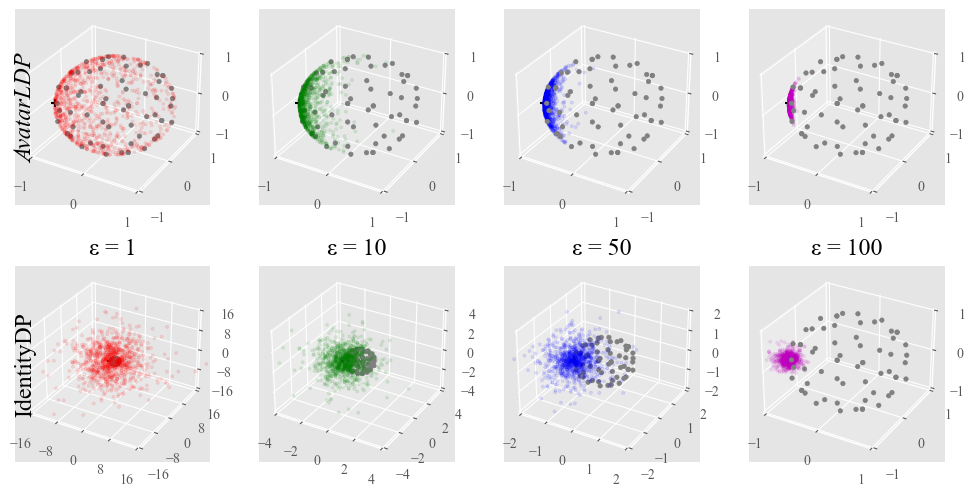

In [ ]:
z = len(eps_list)


plt.rcParams["figure.figsize"] = [12, 6]

fig, ax = plt.subplots(2, z, subplot_kw=dict(projection="3d"))

cols = ["r", "g", "b", "m", "c", "orange"]


for i in range(z):
    ax[0, i].scatter(
        X_embedded[i * n_samples : (i + 1) * n_samples, 0],
        X_embedded[i * n_samples : (i + 1) * n_samples, 1],
        X_embedded[i * n_samples : (i + 1) * n_samples, 2],
        label=eps_list[i],
        color=cols[i],
        alpha=0.1,
        s=5,
    )

    ax[1, i].scatter(
        X_embedded[(z + i) * n_samples : (z + i + 1) * n_samples, 0],
        X_embedded[(z + i) * n_samples : (z + i + 1) * n_samples, 1],
        X_embedded[(z + i) * n_samples : (z + i + 1) * n_samples, 2],
        label=eps_list[i],
        color=cols[i],
        alpha=0.1,
        s=5,
    )

    # first scatter the populating samples
    for j in [0, 1]:
        ax[j, i].scatter(
            X_embedded[(2 * z) * n_samples : -1, 0],
            X_embedded[(2 * z) * n_samples : -1, 1],
            X_embedded[(2 * z) * n_samples : -1, 2],
            color="grey",
            alpha=1,
            s=10,
        )

    b = 1

    for j in [0, 1]:
        ax[j, i].scatter(
            [X_embedded[-1, 0]],
            [X_embedded[-1, 1]],
            [X_embedded[-1, 2]],
            marker="+",
            s=40,
            color="k",
        )
        ax[j, i].set_xlim([-b, b])
        ax[j, i].set_xticks([-1, 0, 1])
        ax[j, i].set_ylim([-b, b])
        ax[j, i].set_yticks([-1, 0, 1])
        ax[j, i].set_zlim([-b, b])
        ax[j, i].set_zticks([-1, 0, 1])

b = 16
ax[1, 0].set_xlim([-b, b])
ax[1, 0].set_xticks([-b, -b / 2, 0, b / 2, b])
ax[1, 0].set_ylim([-b, b])
ax[1, 0].set_yticks([-b, -b / 2, 0, b / 2, b])
ax[1, 0].set_zlim([-b, b])
ax[1, 0].set_zticks([-b, -b / 2, 0, b / 2, b])

b = 4
ax[1, 1].set_xlim([-b, b])
ax[1, 1].set_xticks([-b, -b / 2, 0, b / 2, b])
ax[1, 1].set_ylim([-b, b])
ax[1, 1].set_yticks([-b, -b / 2, 0, b / 2, b])
ax[1, 1].set_zlim([-b, b])
ax[1, 1].set_zticks([-b, -b / 2, 0, b / 2, b])

b = 2
ax[1, 2].set_xlim([-b, b])
ax[1, 2].set_xticks([-b, -b / 2, 0, b / 2, b])
ax[1, 2].set_ylim([-b, b])
ax[1, 2].set_yticks([-b, -b / 2, 0, b / 2, b])
ax[1, 2].set_zlim([-b, b])
ax[1, 2].set_zticks([-b, -b / 2, 0, b / 2, b])

ax[0, 0].text2D(
    0,
    0.5,
    "AvatarLDP",
    style="italic",
    transform=ax[0, 0].transAxes,
    rotation="vertical",
    va="center",
    size="xx-large",
)
ax[1, 0].text2D(
    0,
    0.5,
    "IdentityDP",
    transform=ax[1, 0].transAxes,
    rotation="vertical",
    va="center",
    size="xx-large",
)
ax[0, 0].text2D(
    0.5, -0.25, "ε = 1", ha="center", transform=ax[0, 0].transAxes, size="xx-large"
)
ax[0, 1].text2D(
    0.5, -0.25, "ε = 10", ha="center", transform=ax[0, 1].transAxes, size="xx-large"
)
ax[0, 2].text2D(
    0.5, -0.25, "ε = 50", ha="center", transform=ax[0, 2].transAxes, size="xx-large"
)
ax[0, 3].text2D(
    0.5, -0.25, "ε = 100", ha="center", transform=ax[0, 3].transAxes, size="xx-large"
)

plt.subplots_adjust(wspace=0.25, hspace=0.25)

plt.show()